# 서울시 CCTV 현황 데이터 분석

## 1. 서울통계서비스 사이트에서 '주민등록인구(구별)' 통계에서 2018년도 데이터를 다운 받아서 '서울시 인구현황.txt' 파일로 저장한다.

## 2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
mpl.rc('font',family = 'Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False   
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["font.size"] = 15
%matplotlib inline

In [2]:
pop = pd.read_csv('서울시 인구현황_1.txt',skiprows=[0,1,3],usecols=[1,3,6,9,13],
                  sep = '\t',thousands=',',encoding = "utf-8")
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,종로구,161984,151217,10767,28073
1,중구,136469,126175,10294,23794
2,용산구,246165,229579,16586,39439
3,성동구,307193,299042,8151,44728
4,광진구,365990,350417,15573,48989


In [3]:
pop.columns = ['자치구','인구수','내국인','외국인','고령자']
pop.head()

,자치구,인구수,내국인,외국인,고령자
0,종로구,161984,151217,10767,28073
1,중구,136469,126175,10294,23794
2,용산구,246165,229579,16586,39439
3,성동구,307193,299042,8151,44728
4,광진구,365990,350417,15573,48989


## 3. 외국인 비율과 고령자 비율을 추가한다.

In [4]:
pop['외국인 비율'] = pop.loc[:,'외국인']/pop.loc[:,'인구수']*100
pop['고령자 비율'] = pop.loc[:,'고령자']/pop.loc[:,'인구수']*100
pop.head()

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,161984,151217,10767,28073,6.646953,17.330724
1,중구,136469,126175,10294,23794,7.543105,17.435462
2,용산구,246165,229579,16586,39439,6.737757,16.021368
3,성동구,307193,299042,8151,44728,2.653381,14.560228
4,광진구,365990,350417,15573,48989,4.255034,13.385338


## 4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서 '서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)

In [5]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx',encoding = "utf-8")
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


# 5. '기관명' 컬럼 데이터의 빈칸을 없애고, 컬럼명을 '자치구'로 변경한다.

In [6]:
cctv = cctv.rename({'기관명':'자치구'},axis='columns')
cctv['자치구'] = cctv['자치구'].str.replace(' ', '')
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


# 6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고, 최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.

In [7]:
cctv = cctv.fillna(0)
cctv.iloc[:,1:] = cctv.iloc[:,1:].astype(int)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671


In [8]:
cctv['2015년 이전'] = cctv.loc[:,'2011년 이전':'2015년'].sum(axis=1)
cctv['최근 3개년'] = cctv.loc[:,'2016년':'2018년'].sum(axis=1)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852
2,강북구,1265,243,88,141,74,145,254,1,319,691,574
3,강서구,1617,219,155,118,230,187,190,264,254,909,708
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984


In [9]:
cctv=cctv.loc[:,['자치구','소계','2015년 이전','최근 3개년']]
cctv.head()

,자치구,소계,2015년 이전,최근 3개년
0,강남구,5221,3431,1790
1,강동구,1879,1027,852
2,강북구,1265,691,574
3,강서구,1617,909,708
4,관악구,3985,2001,1984


In [10]:
cctv['최근 증가율'] = cctv.loc[:,'최근 3개년']/cctv.loc[:,'2015년 이전']*100
cctv.head()

,자치구,소계,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,3431,1790,52.171379
1,강동구,1879,1027,852,82.960078
2,강북구,1265,691,574,83.068017
3,강서구,1617,909,708,77.887789
4,관악구,3985,2001,1984,99.150425


# 7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [11]:
cctv = cctv.loc[:,['자치구','소계','최근 증가율']]
cctv.head()

,자치구,소계,최근 증가율
0,강남구,5221,52.171379
1,강동구,1879,82.960078
2,강북구,1265,83.068017
3,강서구,1617,77.887789
4,관악구,3985,99.150425


# 8. 서울시 인구 데이터와 cctv 데이터를 합친다.

In [12]:
total = pd.merge(cctv,pop, on='자치구')
total.set_index('자치구',inplace=True)
total.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


<!-- pop.set_index('자치구',inplace=True)
cctv.set_index('자치구',inplace=True)
total = pd.concat([pop,cctv], axis=1)
pop.head() -->

# 9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

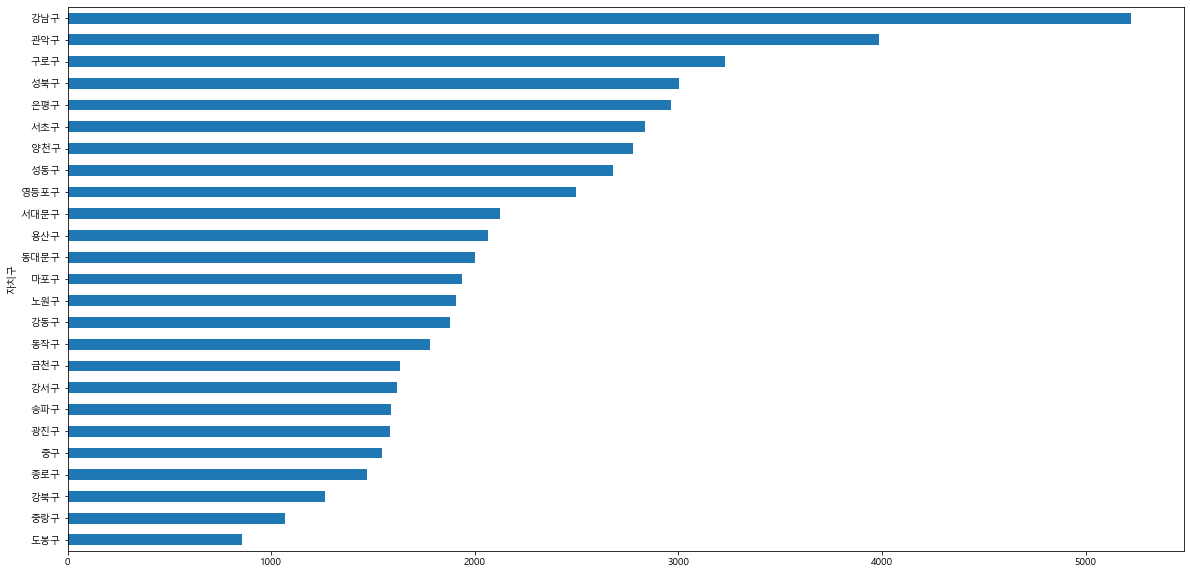

In [13]:
total['소계'].sort_values().plot(kind='barh',figsize=(20,10))
plt.show()

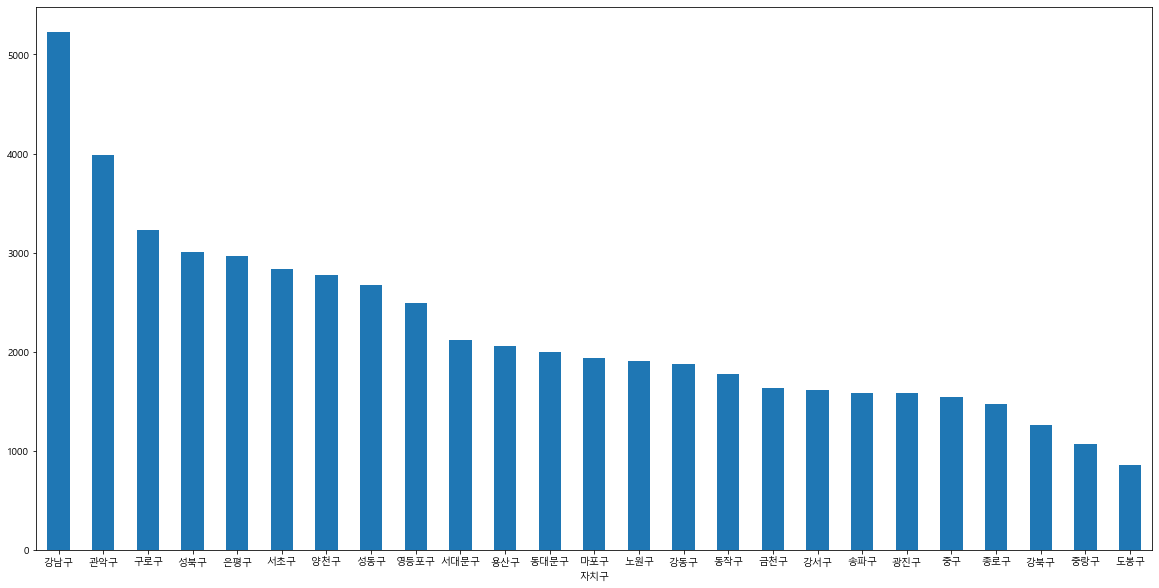

In [14]:
total['소계'].sort_values(ascending=False).plot.bar(rot=0,figsize=(20,10))
plt.show()

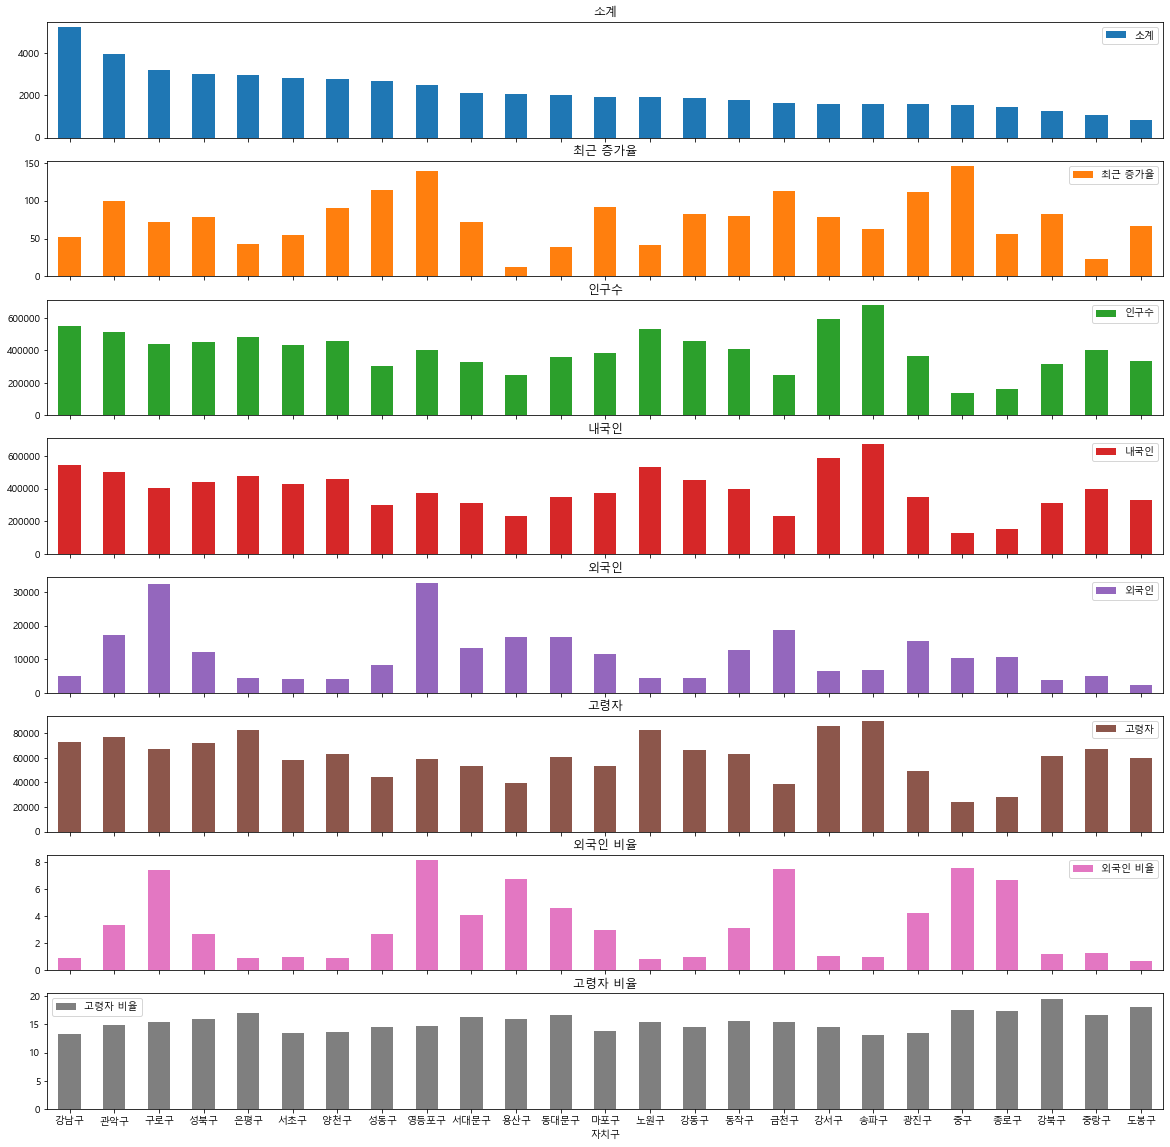

In [15]:
total.sort_values(by=['소계'],ascending=False).plot.bar(rot=0,figsize=(20,20),subplots=True)
plt.show()

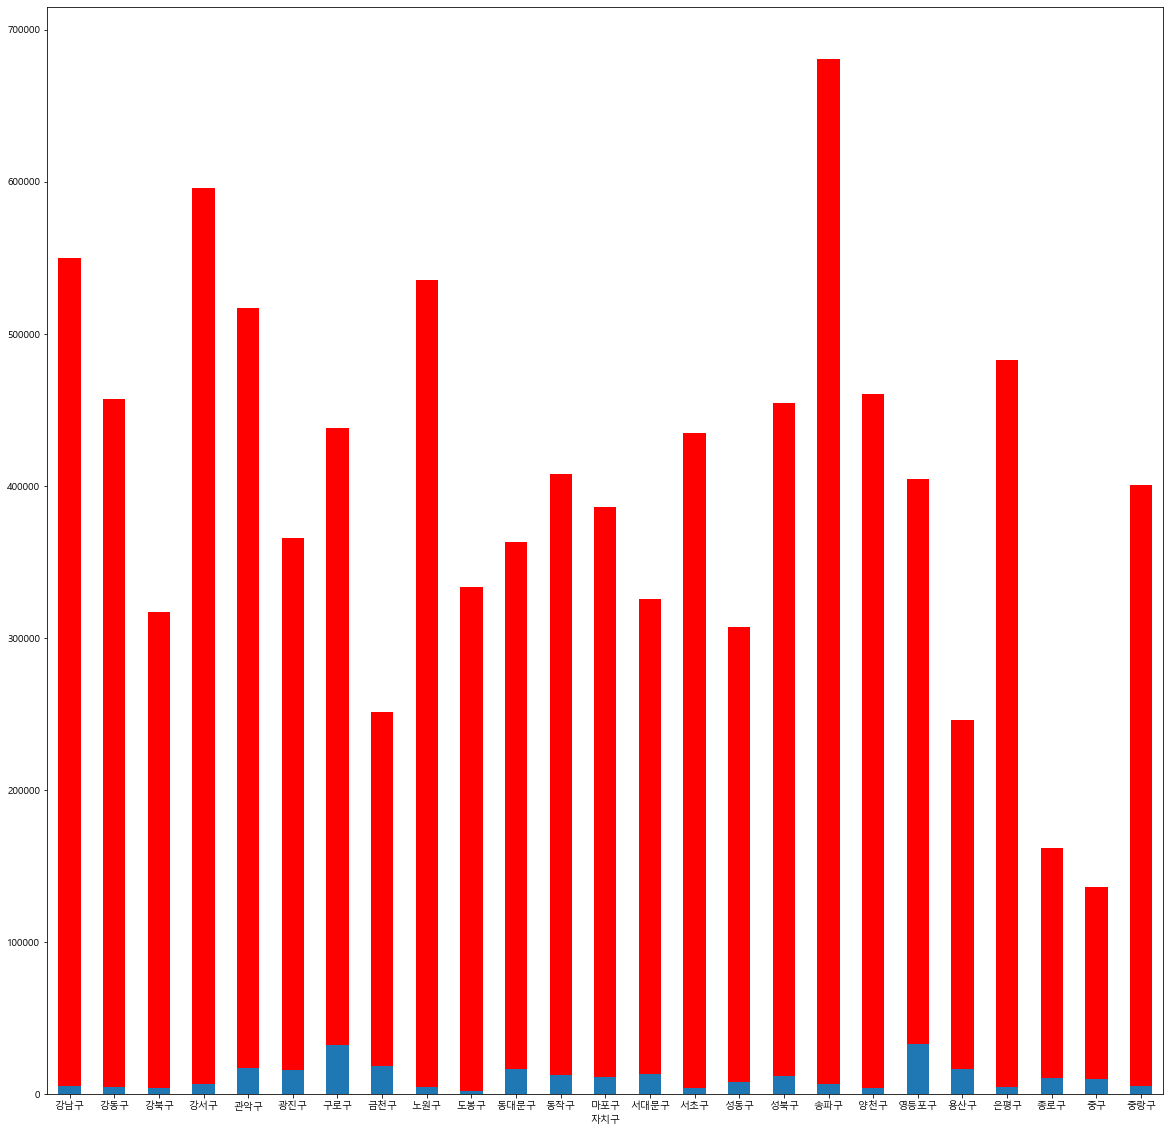

In [16]:
total['인구수'].plot.bar(rot=0,figsize=(20,20),color='r')
total['외국인'].plot.bar(rot=0,figsize=(20,20))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B00059B08>,
      dtype=object)

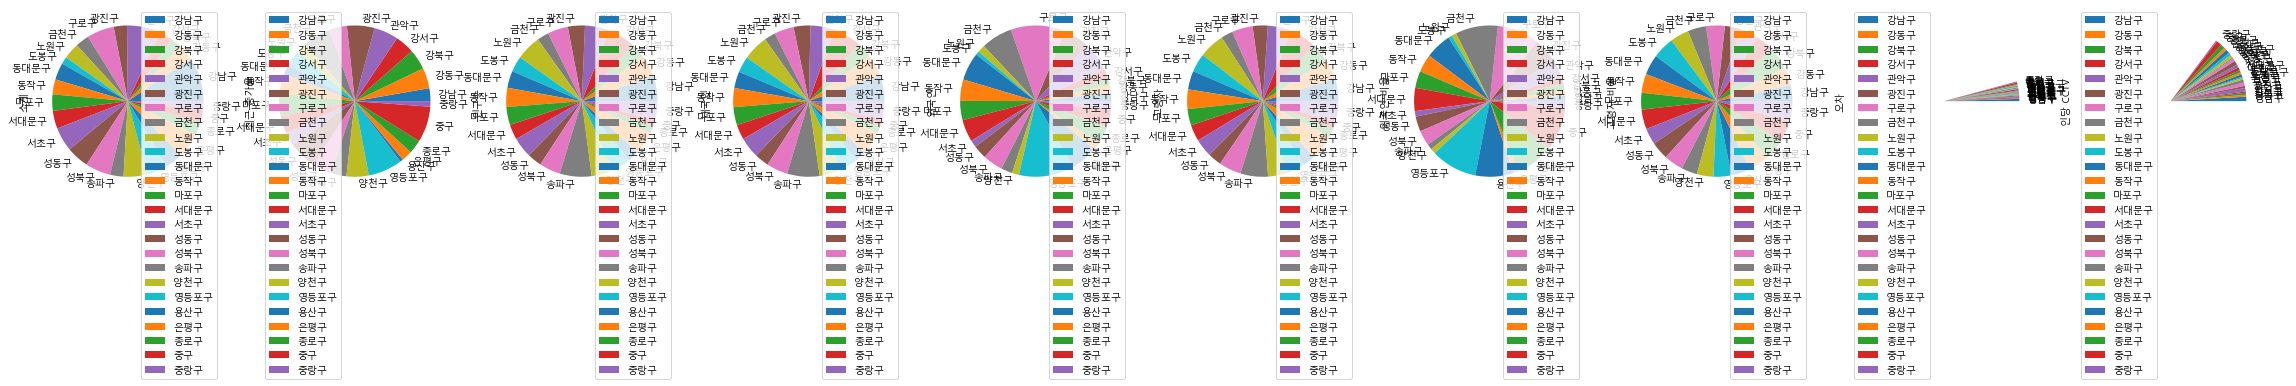

In [34]:
total.plot.pie(subplots=True,figsize=(40,10))

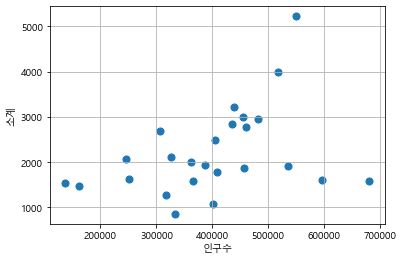

In [18]:
plt.scatter(total['인구수'],total['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

In [19]:
#인구수와 CCTV의 산점도 및 회귀선
#(기울기,y절편)
fp1 = np.polyfit(total['인구수'],total['소계'],1)
fp1

array([2.88522756e-03, 1.06403852e+03])

In [20]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,101)

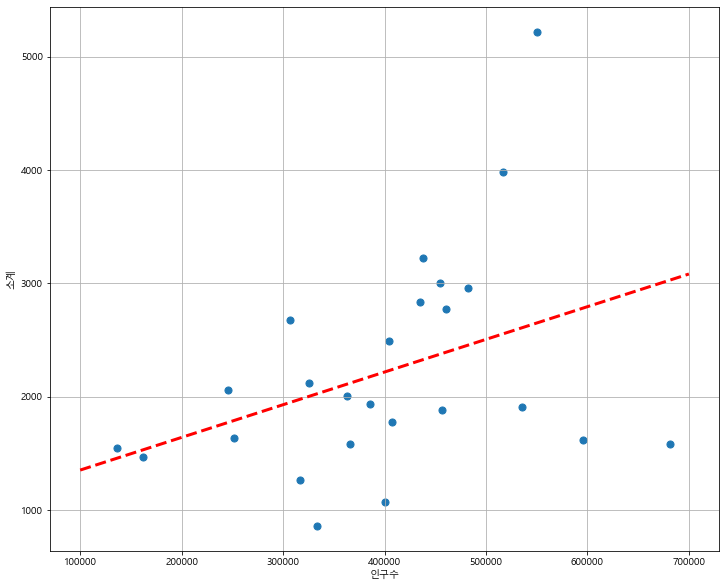

In [21]:
plt.figure(figsize=(12,10))
plt.scatter(total['인구수'],total['소계'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r')
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

In [22]:
#인구수와 CCTV의 산점도 및 회귀선 및 자치구 명
total.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [23]:
total['오차'] = np.abs(total['소계']-f1(total['인구수']))
total.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차
자치구,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,503.708698
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,712.934353
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035


In [24]:
total_sort = total.sort_values(by='오차',ascending=False)
total_sort.head(10)

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차
자치구,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,1152.085731
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615,898.343155
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228,728.639767
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,712.934353


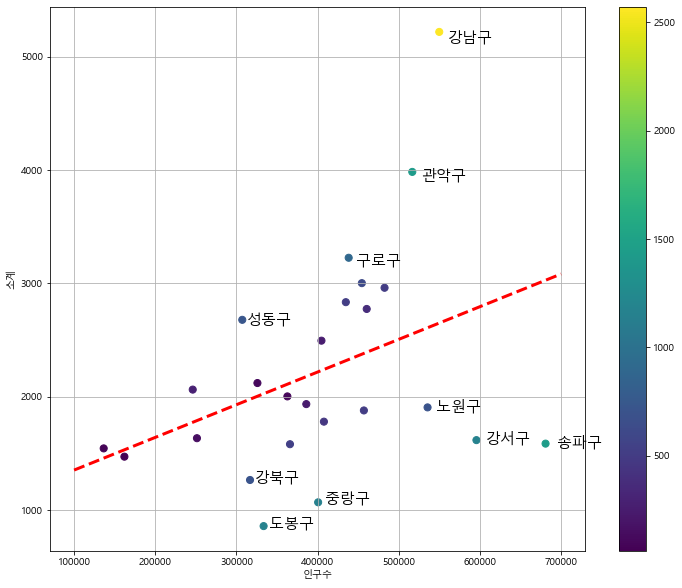

In [25]:
plt.figure(figsize=(12,10))

plt.scatter(total['인구수'],total['소계'],c=total['오차'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r')

for n in range(10):
    plt.text(total_sort['인구수'][n]*1.02,total_sort['소계'][n]*0.98,
            total_sort.index[n],fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('소계')

plt.colorbar()

plt.grid()
plt.show()

In [26]:
total['인당 CCTV'] = total.loc[:,'소계']/total.loc[:,'인구수']
total.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차,인당 CCTV
자치구,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612,0.009494
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,503.708698,0.004111
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,712.934353,0.003994
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237,0.002714
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035,0.007713


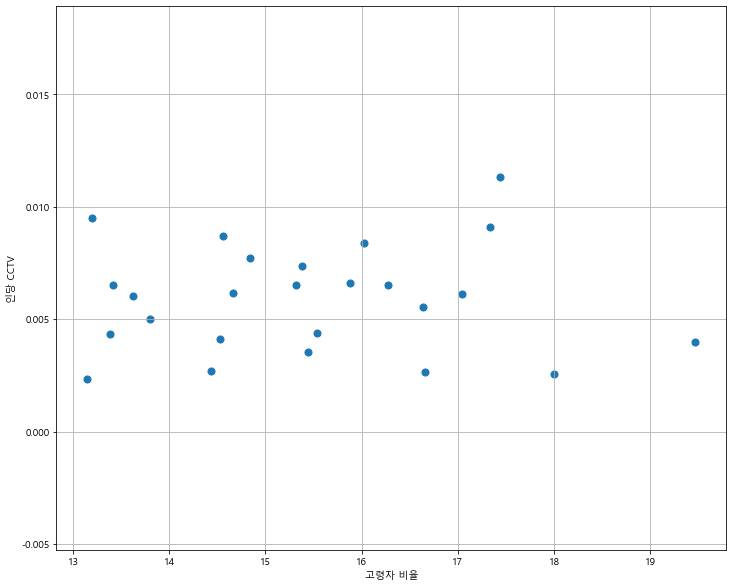

In [27]:
plt.figure(figsize=(12,10))
plt.scatter(total['고령자 비율'],total['인당 CCTV'],s=50)
plt.xlabel('고령자 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()

In [28]:
fp1 = np.polyfit(total['고령자 비율'],total['인당 CCTV'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(12,20,101)

In [29]:
total['오차'] = np.abs(total['인당 CCTV']-f1(total['고령자 비율']))
total.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차,인당 CCTV
자치구,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.003688,0.009494
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424,0.001755,0.004111
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,0.002097,0.003994
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.003148,0.002714
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.001833,0.007713


In [30]:
total_sort = total.sort_values(by='오차',ascending=False)
total_sort.head(10)

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차,인당 CCTV
자치구,,,,,,,,,,
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462,0.005316,0.011314
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.003688,0.009494
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.003474,0.002329
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.003451,0.002573
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,0.003298,0.002665
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.003148,0.002714
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724,0.003088,0.009081
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228,0.002853,0.008721
용산구,2063,12.058664,246165,229579,16586,39439,6.737757,16.021368,0.002446,0.008381


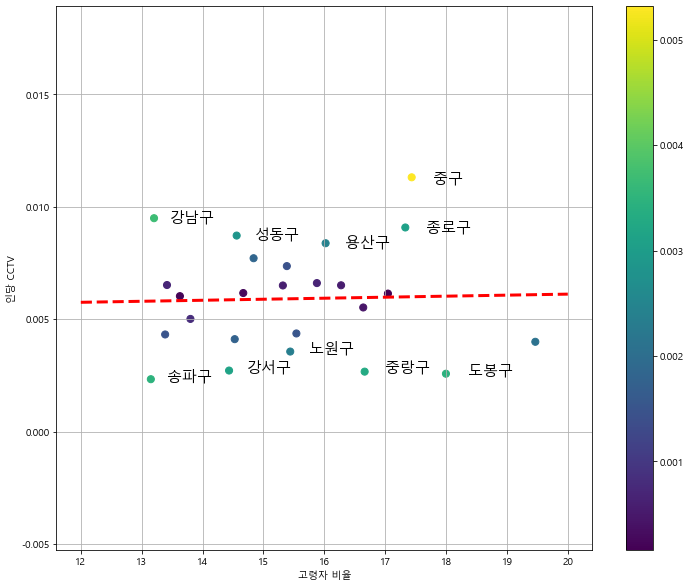

In [31]:
plt.figure(figsize=(12,10))

plt.scatter(total['고령자 비율'],total['인당 CCTV'],c=total['오차'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r')

for n in range(10):
    plt.text(total_sort['고령자 비율'][n]*1.02,total_sort['인당 CCTV'][n]*0.98,
            total_sort.index[n],fontsize=15)
    
plt.xlabel('고령자 비율')
plt.ylabel('인당 CCTV')

plt.colorbar()

plt.grid()
plt.show()

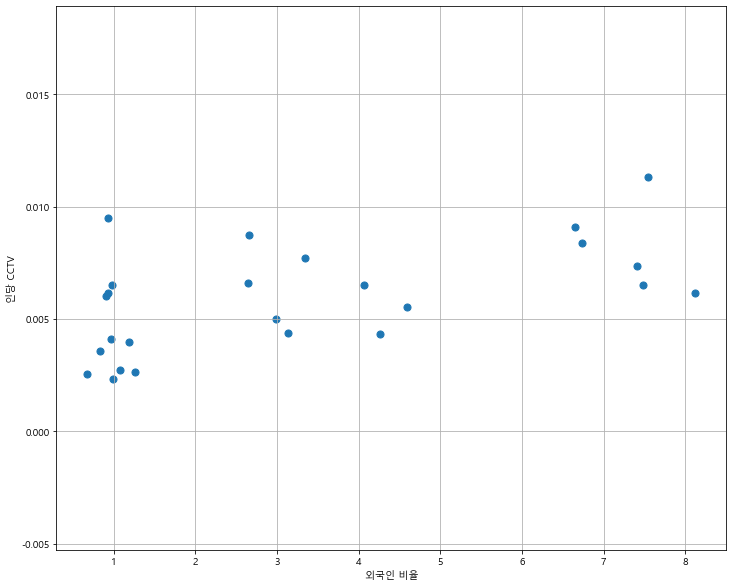

In [32]:
plt.figure(figsize=(12,10))
plt.scatter(total['외국인 비율'],total['인당 CCTV'],s=50)
plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()

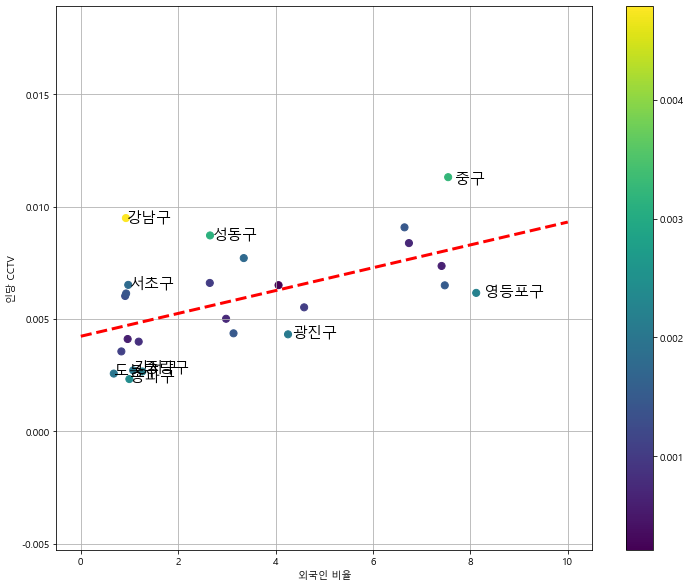

In [33]:
fp1 = np.polyfit(total['외국인 비율'],total['인당 CCTV'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(0,10,101)
total['오차'] = np.abs(total['인당 CCTV']-f1(total['외국인 비율']))
total_sort = total.sort_values(by='오차',ascending=False)

plt.figure(figsize=(12,10))

plt.scatter(total['외국인 비율'],total['인당 CCTV'],c=total['오차'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r')

for n in range(10):
    plt.text(total_sort['외국인 비율'][n]*1.02,total_sort['인당 CCTV'][n]*0.98,
            total_sort.index[n],fontsize=15)
    
plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')

plt.colorbar()

plt.grid()
plt.show()

In [86]:
pop = pd.read_csv('서울시 인구현황_1.txt',skiprows=[0,1,3],usecols=[1,3,6,9],
                  sep = '\t',thousands=',',encoding = "utf-8")
pop.head()

,자치구,계,계.1,계.2
0,종로구,161984,151217,10767
1,중구,136469,126175,10294
2,용산구,246165,229579,16586
3,성동구,307193,299042,8151
4,광진구,365990,350417,15573


In [87]:
pop.columns = ['자치구','인구수','내국인','외국인']
pop.head()

,자치구,인구수,내국인,외국인
0,종로구,161984,151217,10767
1,중구,136469,126175,10294
2,용산구,246165,229579,16586
3,성동구,307193,299042,8151
4,광진구,365990,350417,15573


In [88]:
pop['내국인 비율'] = pop.loc[:,'내국인']/pop.loc[:,'인구수']*100
pop['외국인 비율'] = pop.loc[:,'외국인']/pop.loc[:,'인구수']*100
pop.head()

,자치구,인구수,내국인,외국인,내국인 비율,외국인 비율
0,종로구,161984,151217,10767,93.353047,6.646953
1,중구,136469,126175,10294,92.456895,7.543105
2,용산구,246165,229579,16586,93.262243,6.737757
3,성동구,307193,299042,8151,97.346619,2.653381
4,광진구,365990,350417,15573,95.744966,4.255034


In [89]:
pop= pop.loc[:,['자치구','내국인 비율','외국인 비율']]

pop.set_index('자치구',inplace=True)
pop = pop.T

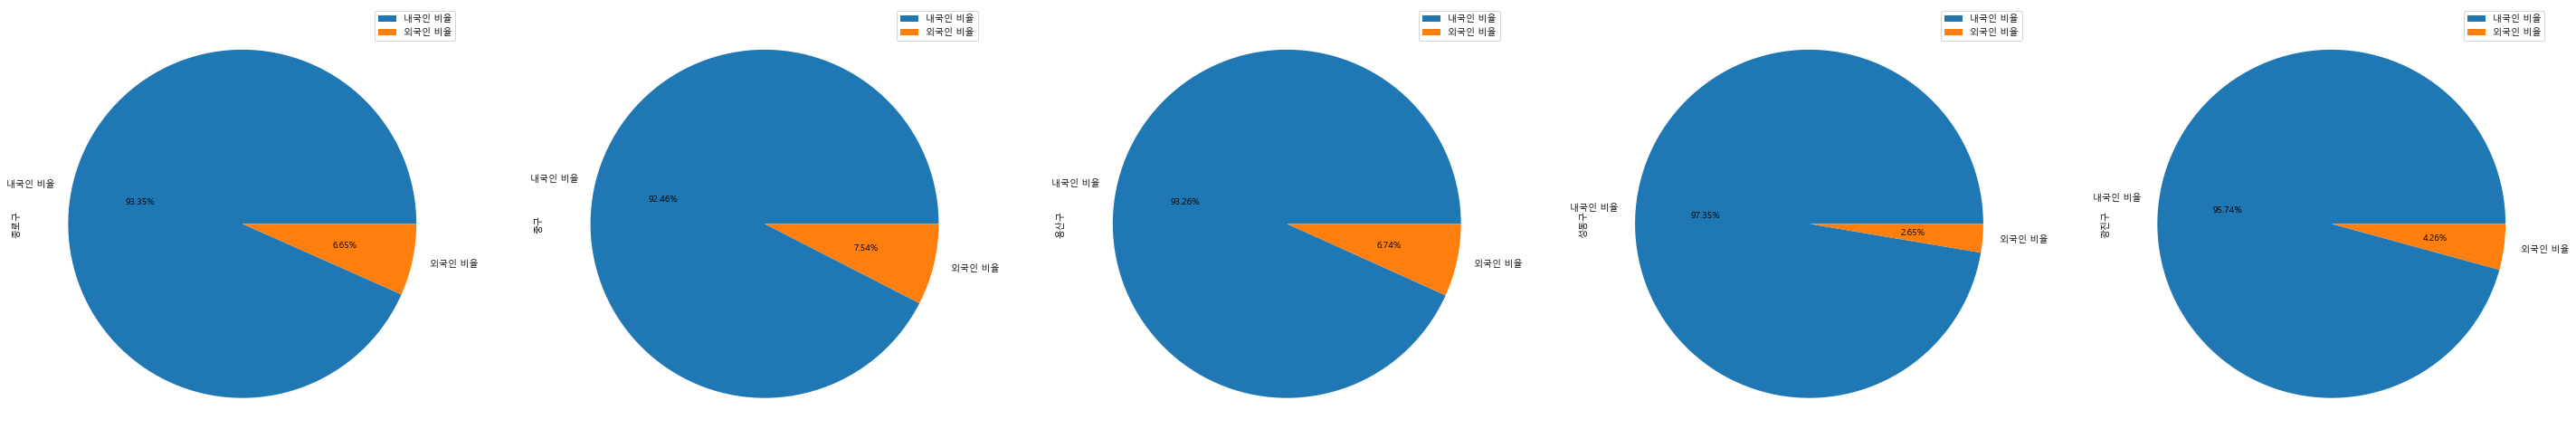

In [99]:
pop.iloc[:,0:5].plot.pie(autopct='%.2f%%',rot=0,subplots=True,figsize=(50,10))
plt.show()